In [1]:
import pandas as pd


In [2]:
customer_feedback = pd.read_csv("customer_feedback.csv")
customer = pd.read_csv("customer.csv")
expansion_outcome = pd.read_csv("expansion_outcome.csv")
product = pd.read_csv("product.csv")
utilization = pd.read_csv("utilization.csv")

In [3]:
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)

In [4]:
merged_data.to_csv("merged_data.csv", index=False)

In [6]:
df=pd.read_csv("merged_data.csv")


In [7]:
df.head(10)

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
0,JMAN_2429072,10-02-2023,1,0,0,0,0,1,0,0,...,2.0,0.500000,2.0,2.0,0,0,1.000000,1.000000,0,0
1,JMAN_9043466,13-01-2023,0,1,1,0,0,1,0,0,...,9.0,0.111111,9.0,9.0,0,1,1.000000,1.000000,0,0
2,JMAN_2452556,24-02-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
3,JMAN_2455113,03-03-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.000000,1.000000,0,0
4,JMAN_18127937,10-02-2023,0,1,0,0,0,1,0,0,...,5.0,0.000000,NaN,5.0,0,0,0.000000,0.000000,0,0
5,JMAN_2373631,03-03-2023,0,1,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
6,JMAN_2447279,03-03-2023,1,0,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
7,JMAN_9004478,20-01-2023,1,0,0,0,0,0,1,0,...,5.0,0.400000,5.0,5.0,0,1,1.000000,1.000000,0,0
8,JMAN_2477864,24-03-2023,1,0,0,0,0,0,1,0,...,6.0,0.166667,6.0,6.0,0,1,1.000000,1.000000,0,0
9,JMAN_2445629,20-01-2023,0,1,0,0,0,0,0,0,...,14.0,0.153846,13.0,14.0,0,1,0.928571,0.928571,0,0


In [8]:
df.columns

Index(['id', 'score_date', 'segment_smb', 'segment_non_smb',
       'segment_commercial', 'segment_enterprise', 'segment_midmarket',
       'region_emea', 'region_apac', 'region_latam', 'region_amer',
       'customer_age_quarters', 'sales_assisted', 'legacy_flag',
       'product_counts', 'billing_dunning_not_ok', 'crm_industry_current',
       'crm_employee_range', 'crm_success_owner_change', 'csat_score',
       'csat_response_rate', 'nps_score', 'nps_score_all_time',
       'avg_nps_rating', 'avg_nps_rating_all_time', 'outreach_call_90dayflag',
       'num_low_sev_outages', 'num_high_sev_outages', 'has_high_sev_outage',
       'months_since_high_sev_outage', 'num_tickets_deflected',
       'max_tickets_per_agent', 'current_arr', 'future_arr', 'arr_change',
       'fx_impact', 'seat_change_arr', 'product_change_arr',
       'discount_arr_usd', 'team_plus', 'pro_plus', 'ent_plus',
       'discount_arr_usd_percentage', 'product_counts_percentage',
       'total_pool_max_agents', 'max_

In [9]:
df.nunique()

id                                     1053
score_date                               13
segment_smb                               2
segment_non_smb                           2
segment_commercial                        2
segment_enterprise                        2
segment_midmarket                         2
region_emea                               2
region_apac                               2
region_latam                              2
region_amer                               2
customer_age_quarters                    27
sales_assisted                            2
legacy_flag                               1
product_counts                            7
billing_dunning_not_ok                    2
crm_industry_current                     15
crm_employee_range                        8
crm_success_owner_change                  2
csat_score                               17
csat_response_rate                       62
nps_score                                 6
nps_score_all_time              

In [13]:
import pandas as pd
 
# Load the dataset
file_path = "merged_data.csv"  # Change this to your local file path
df = pd.read_csv(file_path)
 
# Remove duplicates
df_cleaned = df.drop_duplicates()
 
# Convert 'score_date' to datetime and retain all rows
# df_cleaned['score_date'] = pd.to_datetime(df_cleaned['score_date'], errors='coerce')
 
# Fill missing numerical values with the median
num_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())
 
# Fill missing categorical values with 'Unknown'
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna('Unknown')
 
# Ensure binary columns are explicitly int64
binary_cols = [col for col in df_cleaned.columns if set(df_cleaned[col].dropna().unique()).issubset({0, 1})]
df_cleaned[binary_cols] = df_cleaned[binary_cols].astype('int64')
 
# Convert 'seat_utilization' to float if incorrectly stored as object
if 'seat_utilization' in df_cleaned.columns:
    df_cleaned['seat_utilization'] = pd.to_numeric(df_cleaned['seat_utilization'], errors='coerce')
 
# Identify columns that should be float (ratios, percentages, revenue, etc.)
float_cols = [
    'nps_score', 'nps_score_all_time', 'avg_nps_rating', 'avg_nps_rating_all_time',
    'current_arr', 'future_arr', 'arr_change', 'fx_impact', 'seat_utilization',
    'seat_utilization_M_before', 'agent_utilization'
]
existing_float_cols = [col for col in float_cols if col in df_cleaned.columns]
df_cleaned[existing_float_cols] = df_cleaned[existing_float_cols].astype('float64')
 
# Fix incorrect values in 'crm_employee_range'
valid_employee_ranges = [
    "1 - 9", "10 - 49", "50 - 99", "100 - 249", "250 - 499",
    "500 - 999", "1000 - 4999", "5000+"
]
 
if 'crm_employee_range' in df_cleaned.columns:
    # Convert to string for proper checking
    df_cleaned['crm_employee_range'] = df_cleaned['crm_employee_range'].astype(str)
 
    # Replace any value not in the valid list with 'Unknown'
    df_cleaned['crm_employee_range'] = df_cleaned['crm_employee_range'].apply(
        lambda x: x if x in valid_employee_ranges else "Unknown"
    )
 
    # Convert back to categorical type
    df_cleaned['crm_employee_range'] = df_cleaned['crm_employee_range'].astype('category')
 
# Save the cleaned dataset
cleaned_file_path = "final_corrected_merged_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as: {cleaned_file_path}")

Cleaned dataset saved as: final_corrected_merged_data.csv


In [14]:
df=pd.read_csv("final_corrected_merged_data.csv")
df.head(10)

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
0,JMAN_2429072,10-02-2023,1,0,0,0,0,1,0,0,...,2.0,0.500000,2.0,2.0,0,0,1.000000,1.000000,0,0
1,JMAN_9043466,13-01-2023,0,1,1,0,0,1,0,0,...,9.0,0.111111,9.0,9.0,0,1,1.000000,1.000000,0,0
2,JMAN_2452556,24-02-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
3,JMAN_2455113,03-03-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.000000,1.000000,0,0
4,JMAN_18127937,10-02-2023,0,1,0,0,0,1,0,0,...,5.0,0.000000,3.0,5.0,0,0,0.000000,0.000000,0,0
5,JMAN_2373631,03-03-2023,0,1,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
6,JMAN_2447279,03-03-2023,1,0,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0
7,JMAN_9004478,20-01-2023,1,0,0,0,0,0,1,0,...,5.0,0.400000,5.0,5.0,0,1,1.000000,1.000000,0,0
8,JMAN_2477864,24-03-2023,1,0,0,0,0,0,1,0,...,6.0,0.166667,6.0,6.0,0,1,1.000000,1.000000,0,0
9,JMAN_2445629,20-01-2023,0,1,0,0,0,0,0,0,...,14.0,0.153846,13.0,14.0,0,1,0.928571,0.928571,0,0


In [17]:
# Group by 'customerid' and calculate the mean of 'customer satisfaction score'
grouped_df = df.groupby('id')['csat_score'].mean().reset_index()

# Display the resulting DataFrame
# grouped_df.head(10)

In [22]:
# Filter rows where 'csat_score' is 0
filtered_df = grouped_df[grouped_df['csat_score'] != 0]

# Display the filtered DataFrame
filtered_df

,id,csat_score
3,JMAN_10059360,100.000000
7,JMAN_10078002,80.000000
12,JMAN_10148809,84.615385
14,JMAN_10177857,100.000000
19,JMAN_10243552,100.000000
...,...,...
1035,JMAN_9810546,50.000000
1039,JMAN_9827638,100.000000
1040,JMAN_9839217,100.000000
1044,JMAN_9897409,100.000000


C:\Users\SatheeshPeriyasamy\AppData\Local\Temp\ipykernel_19132\3981556100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_df['csat_score'], shade=True, color='blue')


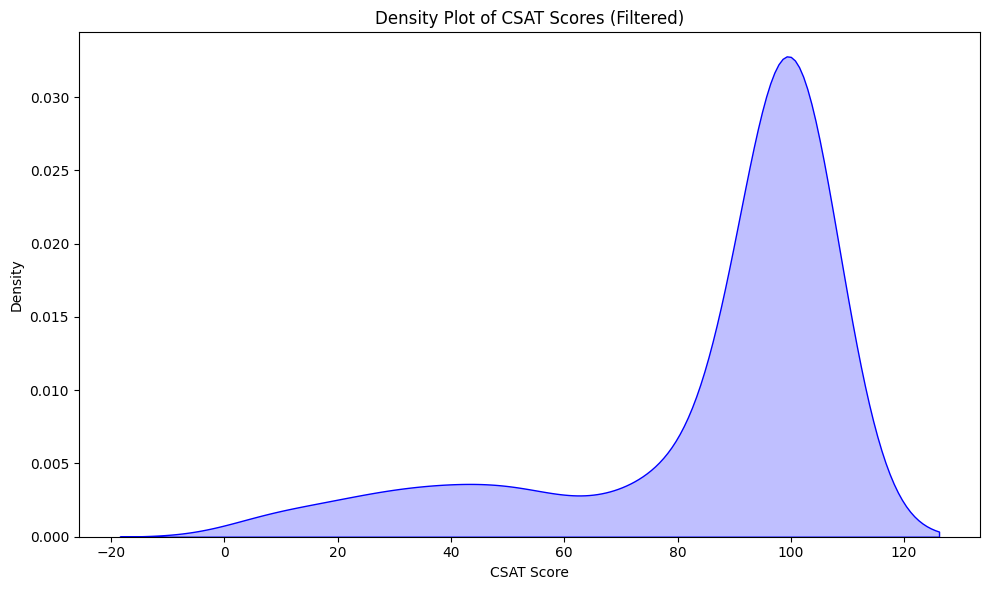

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a density plot for 'csat_score'
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_df['csat_score'], shade=True, color='blue')
plt.xlabel('CSAT Score')
plt.ylabel('Density')
plt.title('Density Plot of CSAT Scores (Filtered)')
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
df.nunique()

id                                     1053
score_date                               13
segment_smb                               2
segment_non_smb                           2
segment_commercial                        2
segment_enterprise                        2
segment_midmarket                         2
region_emea                               2
region_apac                               2
region_latam                              2
region_amer                               2
customer_age_quarters                    27
sales_assisted                            2
legacy_flag                               1
product_counts                            7
billing_dunning_not_ok                    2
crm_industry_current                     16
crm_employee_range                        7
crm_success_owner_change                  2
csat_score                               17
csat_response_rate                       62
nps_score                                 6
nps_score_all_time              

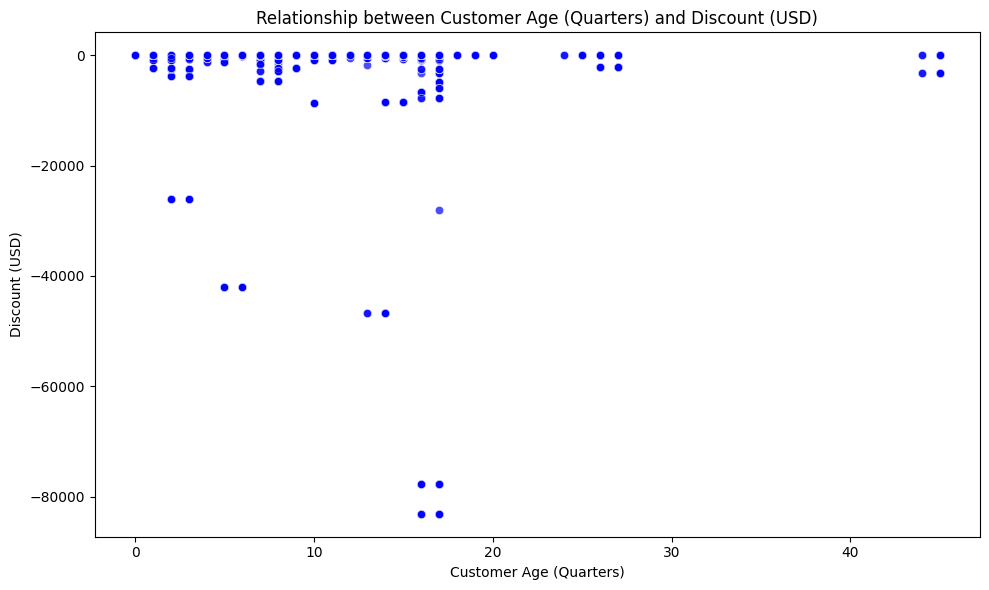

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for relationship between 'customer_age_quarters' and 'discount_arr_usd'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer_age_quarters', y='discount_arr_usd', color='blue', alpha=0.7)
plt.xlabel('Customer Age (Quarters)')
plt.ylabel('Discount (USD)')
plt.title('Relationship between Customer Age (Quarters) and Discount (USD)')
plt.tight_layout()

# Show the plot
plt.show()